# Распознавание моделей одежды из набора данных Fashion MNIST

Конструкции Keras, упрощающие написание кода

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://www.asozykin.ru/courses/nnpython)".

<a target="_blank" href="https://colab.research.google.com/github/sozykin/dlpython_course/blob/master/introduction/fashion_mnist_syntactic_sugar.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [27]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Список с названиями классов

In [28]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

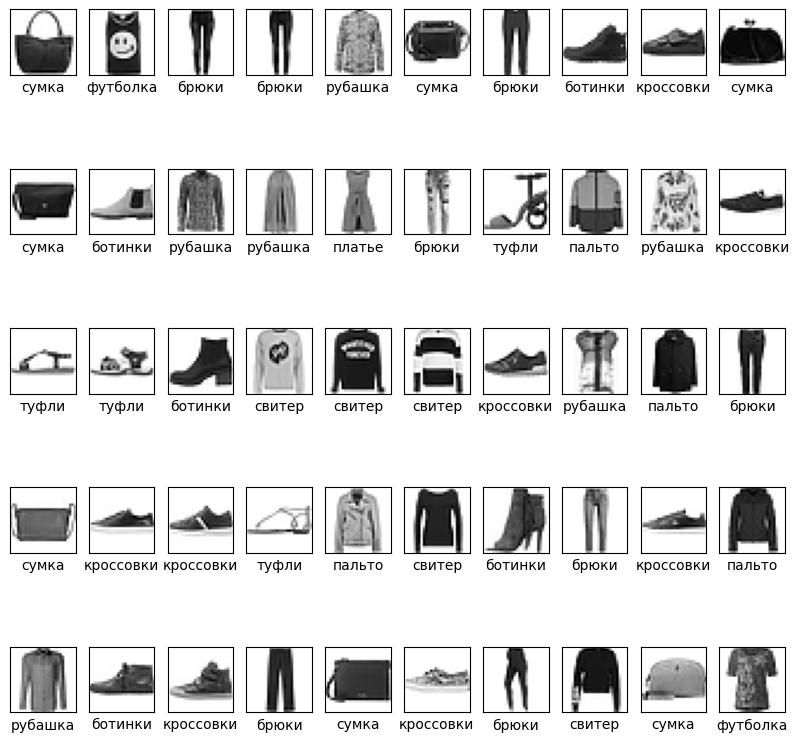

In [29]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Нормализация данных**

In [30]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255 
x_test = x_test / 255 

## Создаем нейронную сеть

**Создаем последовательную модель**

In [32]:
# Создаем последовательную модель
model = Sequential(
    [   
        # Слой, который преобразует матрицу 28х28 в плоский вектор
        Flatten(),
        # Входной полносвязный слой, 800 нейрона
        # Количество входов не указываем, Keras определяет автоматически
        # после первого запуска
        Dense(800, activation="relu"),
        # Выходной полносвязный слой, 10 нейронов (по количеству классов)
        Dense(10, activation="softmax")
    ]
)

**Компилируем сеть**

In [33]:
model.compile(loss="sparse_categorical_crossentropy", # Функция потерь, нужно преобразовывать метки в формат one hot encoding
              optimizer="SGD",                        # Оптимизатор
              metrics=["accuracy"])    


In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Обучаем нейронную сеть

In [35]:
history = model.fit(x_train,              # Данные для обучения
                    y_train,              # Правильные ответы
                    batch_size=200,       # Размер мини-выборки
                    epochs=100,           # Количество эпох обучения
                    validation_split=0.2, # Доля для проверочного набора данных
                    verbose=2)            # Выводить только итог обучения для каждой эпохи

Epoch 1/100
240/240 - 1s - 5ms/step - accuracy: 0.6553 - loss: 1.1987 - val_accuracy: 0.7476 - val_loss: 0.8399
Epoch 2/100
240/240 - 1s - 4ms/step - accuracy: 0.7645 - loss: 0.7636 - val_accuracy: 0.7804 - val_loss: 0.6949
Epoch 3/100
240/240 - 1s - 3ms/step - accuracy: 0.7911 - loss: 0.6642 - val_accuracy: 0.8004 - val_loss: 0.6293
Epoch 4/100
240/240 - 1s - 3ms/step - accuracy: 0.8057 - loss: 0.6118 - val_accuracy: 0.8102 - val_loss: 0.5893
Epoch 5/100
240/240 - 1s - 4ms/step - accuracy: 0.8152 - loss: 0.5766 - val_accuracy: 0.8150 - val_loss: 0.5643
Epoch 6/100
240/240 - 1s - 3ms/step - accuracy: 0.8218 - loss: 0.5530 - val_accuracy: 0.8207 - val_loss: 0.5423
Epoch 7/100
240/240 - 1s - 3ms/step - accuracy: 0.8255 - loss: 0.5336 - val_accuracy: 0.8225 - val_loss: 0.5277
Epoch 8/100
240/240 - 1s - 3ms/step - accuracy: 0.8294 - loss: 0.5188 - val_accuracy: 0.8254 - val_loss: 0.5167
Epoch 9/100
240/240 - 1s - 3ms/step - accuracy: 0.8338 - loss: 0.5060 - val_accuracy: 0.8253 - val_loss:

### Визуализация прогресса обучения

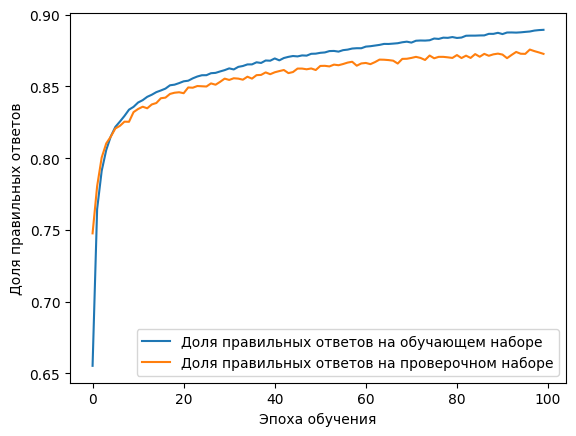

In [36]:
plt.plot(history.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

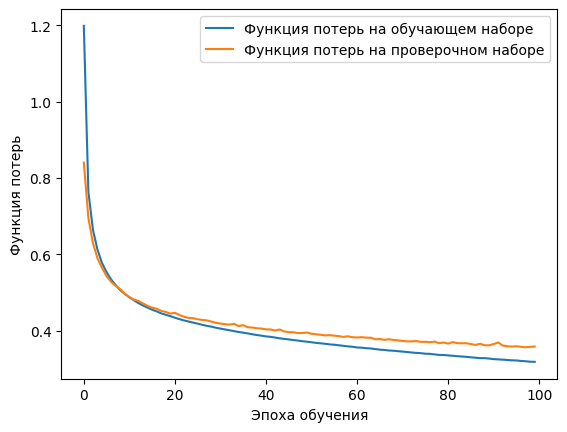

In [37]:
plt.plot(history.history['loss'], 
         label='Функция потерь на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Функция потерь на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Функция потерь')
plt.legend()
plt.show()

## Смотрим информацию по нейронной сети

In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (200, 784)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (200, 800)             │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (200, 10)              │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,012 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [39]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8664 - loss: 0.3805


In [40]:
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля правильных ответов на тестовых данных, в процентах: 86.64


## Используем сеть для распознавания предметов одежды

In [41]:
n_rec = 495

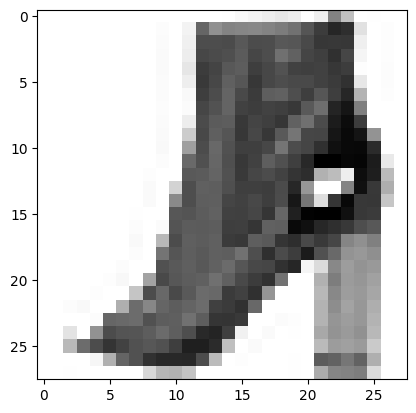

In [42]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [43]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [55]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


**Печатаем результаты распознавания**

In [56]:
prediction

array([[3.2108466e-05, 6.0930353e-07, 3.5419409e-06, 2.4054498e-06,
        6.3251846e-08, 3.3476237e-02, 1.2210137e-05, 3.0561408e-04,
        9.2150522e-06, 9.6615815e-01]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [57]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 9
Название класса: ботинки


**Печатаем правильный ответ**

In [58]:
print("Номер класса:", y_test[0])
print("Название класса:", classes[y_test[0]])

Номер класса: 9
Название класса: ботинки
